# Object detection with model zoo model

In this tutorial, you learn how to use a built-in model zoo model (SSD) to achieve an [object detection](https://en.wikipedia.org/wiki/Object_detection) task.

## Preparation

This tutorial requires the installation of Java Kernel. To install Java Kernel, see the [README](https://github.com/awslabs/djl/blob/master/jupyter/README.md).

In [1]:
// %mavenRepo snapshots https://oss.sonatype.org/content/repositories/snapshots/

%maven ai.djl:api:0.10.0
%maven ai.djl.mxnet:mxnet-engine:0.10.0
%maven ai.djl.mxnet:mxnet-model-zoo:0.10.0
%maven org.slf4j:slf4j-api:1.7.26
    
%maven org.slf4j:slf4j-simple:1.7.26
%maven net.java.dev.jna:jna:5.3.0
        
// See https://github.com/awslabs/djl/blob/master/mxnet/mxnet-engine/README.md
// for more MXNet library selection options
%maven ai.djl.mxnet:mxnet-native-auto:1.7.0-backport

In [2]:
import ai.djl.modality.cv.*;
import ai.djl.modality.cv.util.*;
import ai.djl.mxnet.zoo.*;
import ai.djl.repository.zoo.*;
import ai.djl.training.util.*;

## Step 1: Load image

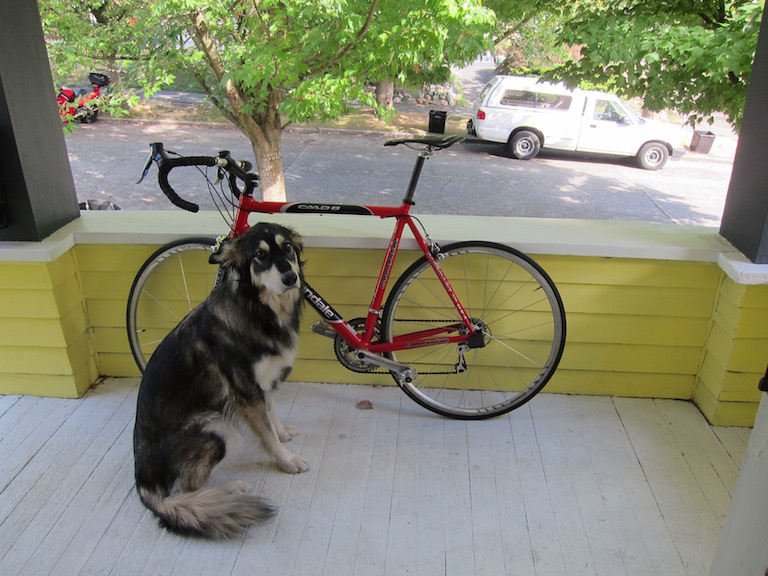

In [3]:
var img = ImageFactory.getInstance().fromUrl("https://resources.djl.ai/images/dog_bike_car.jpg");
img.getWrappedImage()

## Step 2: Load model zoo model

In this example, you load a SSD (Single Shot MultiBox Detector) model from the MXNet model zoo.
For more information about model zoo, see the [Model Zoo Documentation](https://github.com/awslabs/djl/blob/master/docs/model-zoo.md) 

In [4]:
var model = MxModelZoo.SSD.loadModel(new ProgressBar());

Loading:     100% |████████████████████████████████████████|


## Step 3: Create Predictor and detect an object in the image

In [5]:
var detections = model.newPredictor().predict(img);

detections

[
	class: "car", probability: 0.99991, bounds: [x=0.611, y=0.137, width=0.293, height=0.160]
	class: "bicycle", probability: 0.95385, bounds: [x=0.162, y=0.207, width=0.594, height=0.588]
	class: "dog", probability: 0.93752, bounds: [x=0.168, y=0.350, width=0.274, height=0.593]
]

## Check detected result

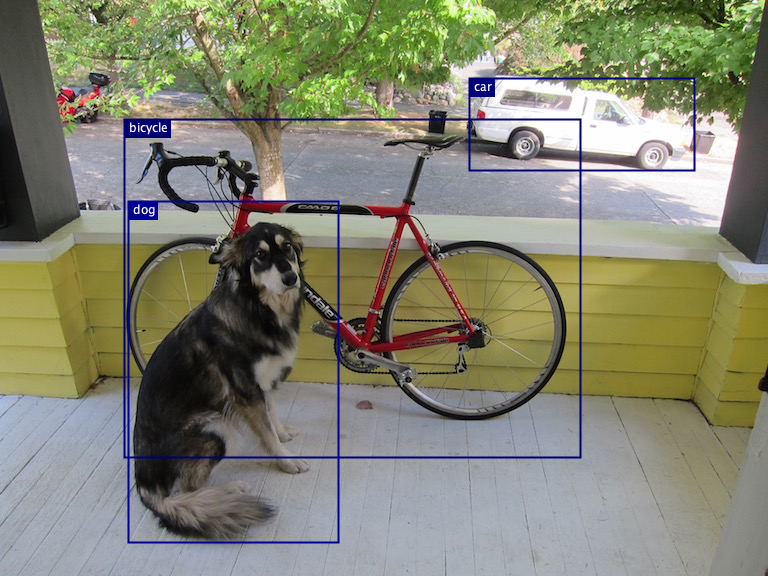

In [6]:
img.drawBoundingBoxes(detections);
img.getWrappedImage()

## Summary

Using the model zoo model provided, you can run inference with just the following three lines of code:

```
var img = ImageFactory.getInstance().fromUrl("https://resources.djl.ai/images/dog_bike_car.jpg");
var model = MxModelZoo.SSD.loadModel();
var detections = model.newPredictor().predict(img);
```

You can find full SsdExample source code [here](https://github.com/awslabs/djl/blob/master/examples/docs/object_detection.md).
